### Stochastic SIR model using pomp

In [1]:
library(pomp)
library(reshape2)

In [2]:
sir.step <- "
double lambd = bet * (I+iota) / N;
double ifrac = 1.0 - exp(-lambd *dt);
double rfrac = 1.0 - exp(-gamm*dt);
double infection = rbinom(S, ifrac);
double recovery = rbinom(I, rfrac);
S += -infection;
I += infection - recovery;
R += recovery;
Y += infection;
"

rmeas <- "
Z = Y;
"

In [3]:
pomp(
  data=data.frame(time=seq(0,200,by=0.1),Z=rep(0,2001)),
  times="time",
  t0=0,
  rmeasure=Csnippet(rmeas),
  rprocess=euler.sim(
    step.fun=Csnippet(sir.step),
    delta.t=0.1
  ),
  statenames=c("S","I","R","Y"),
  paramnames=c(
    "bet","gamm","iota", "N"
  ), 
  initializer=function(params, t0, ...) {
    x0 <- c(S=999,I=1,R=0,Y=0)
    x0
  }, 
  params=c(bet=0.1, gamm=0.05, iota=0.01, N=1000.0)
) -> sir

In [4]:
set.seed(42)

In [5]:
sir_sim <- simulate(sir)

In [6]:
sir_sim

2001 records of 1 observables, recorded from t = 0 to 200 
summary of data:
       Z        
 Min.   :  0.0  
 1st Qu.:  6.0  
 Median : 73.0  
 Mean   :163.3  
 3rd Qu.:285.0  
 Max.   :574.0  
zero time, t0 = 0
process model simulator, rprocess = function (xstart, times, params, ..., zeronames = character(0), 
    tcovar, covar, .getnativesymbolinfo = TRUE) 
{
    tryCatch(.Call(euler_model_simulator, func = efun, xstart = xstart, 
        times = times, params = params, deltat = object@delta.t, 
        method = 0L, zeronames = zeronames, tcovar = tcovar, 
        covar = covar, args = pairlist(...), gnsi = .getnativesymbolinfo), 
        error = function(e) {
            stop(ep, conditionMessage(e), call. = FALSE)
        })
}
<environment: 0x55f3738>
process model density, dprocess = function (x, times, params, log = FALSE, ...) 
stop(sQuote("dprocess"), " not specified", call. = FALSE)
<environment: 0x4afab20>
measurement model simulator, rmeasure = native function ‘__pomp_rmeas

In [7]:
sir_out <- data.frame(Time=sir_sim@times,Cases=as.integer(sir_sim@data))

In [8]:
sir_out_long <- melt(as.data.frame(sir_out),"Time")

#### Visualisation

In [9]:
library(ggplot2)

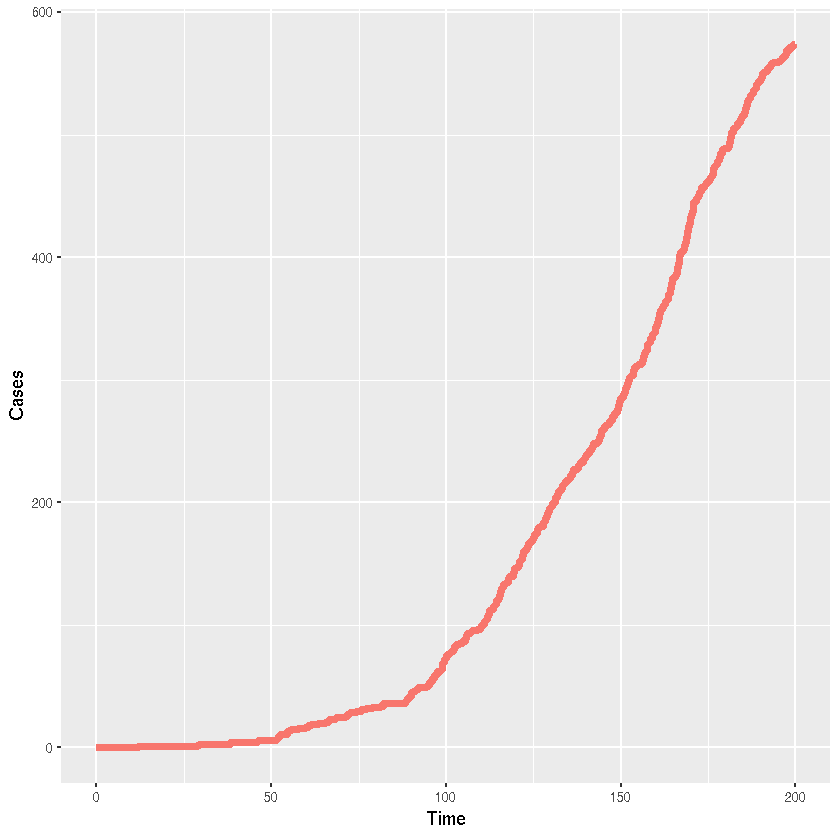

In [10]:
ggplot(sir_out_long,aes(x=Time,y=value,colour=variable,group=variable))+
  # Add line
  geom_step(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Cases")+
  theme(legend.position="none")